<a href="https://colab.research.google.com/github/macscheffer/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cols = [
    'age', # age of patient at the time of operation
    'operation_year', # year that the operation took place 
    'positive_axillary_nodes', # positive axillary nodes that we're detected.
    'survival' # Survival status, 1 == the patient survived for >= 5 years after operation, 2 == the patient died within 5 years of the operation
]

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names=cols)

df.shape

(306, 4)

In [2]:
# the first sum is a method for each series in the df, the second sum adds together the total for each series.
df.isna().sum().sum()

0

In [5]:
# replacing 2s in the survival column with 0s, meaning they passed away within 5 years after the surgery.
df.survival = df.survival.replace(to_replace=2, value=0)
df.head()

,age,operation_year,positive_axillary_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [6]:
# 73.53 % survival rate
df.describe()

,age,operation_year,positive_axillary_nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [7]:
# creating age bucket, and operation year columns

age_bins = pd.cut(df.age, bins=6)
operation_year_bins = pd.cut(df.operation_year, bins=6)

df['age_bins'] = age_bins
df['operation_year_bins'] = operation_year_bins

# showing the proportion of people in each age bin for each column
# for example the top right value of 0.588 means that between 1968 and 1969 had only 5% of our youngest patients.
pd.crosstab(df.age_bins,df.operation_year_bins, normalize='index')

operation_year_bins,"(57.989, 59.833]","(59.833, 61.667]","(61.667, 63.5]","(63.5, 65.333]","(65.333, 67.167]","(67.167, 69.0]"
age_bins,,,,,,
"(29.947, 38.833]",0.205882,0.294118,0.147059,0.147059,0.147059,0.058824
"(38.833, 47.667]",0.232877,0.123288,0.191781,0.219178,0.164384,0.068493
"(47.667, 56.5]",0.188889,0.200000,0.188889,0.155556,0.177778,0.088889
"(56.5, 65.333]",0.197183,0.197183,0.154930,0.239437,0.154930,0.056338
"(65.333, 74.167]",0.212121,0.090909,0.151515,0.151515,0.242424,0.151515
"(74.167, 83.0]",0.200000,0.000000,0.200000,0.400000,0.200000,0.000000


In [11]:
# in general, as age goes up, survival rates go down. 

df.pivot_table(values='survival', index='age_bins')

,survival
age_bins,
"(29.947, 38.833]",0.911765
"(38.833, 47.667]",0.684932
"(47.667, 56.5]",0.700000
"(56.5, 65.333]",0.760563
"(65.333, 74.167]",0.727273
"(74.167, 83.0]",0.600000


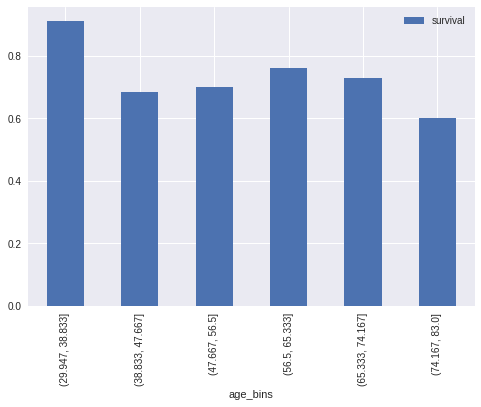

In [12]:
# as a graph
df.pivot_table(values='survival', index='age_bins').plot.bar()

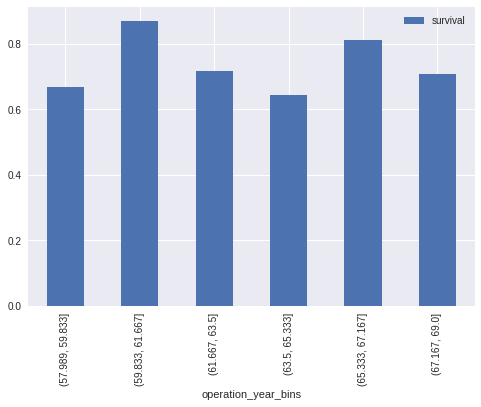

In [14]:
# as the year of operation goes up, the trend seems to be volatile, but up
df.pivot_table(values='survival', index='operation_year_bins').plot.bar()

Text(0.5,0,'Positive Axillary Nodes')

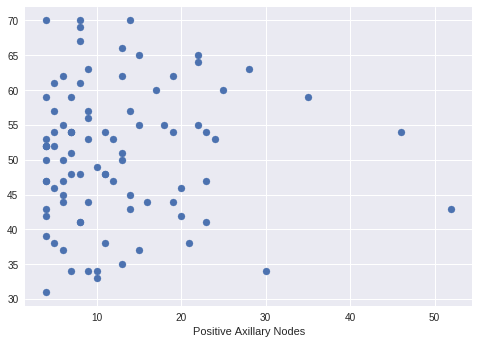

In [17]:
# messy at lower x values but can generally see there is a slight negative correlation between age and positive_axillary_nodes
plt.scatter(x=df.positive_axillary_nodes[df.positive_axillary_nodes > 3], y=df.age[df.positive_axillary_nodes > 3])
plt.xlabel('Positive Axillary Nodes')

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

One feature that looks to have a positive relationship with survival is operation year. While both age and positive_axillary_nodes seem to have a negative correlation with survival. 

It's important to note is that age and operation year are correlated. Meaning as the operation year goes up, the patients tend to be older. This may lead to the overall percentage of survivors year over year to look discouraging, ie not going up as fast as researches or people in general would hope. 

Another interesting note, and would need more digging to come to a conclusion, is that age and positive axillary nodes are negatively correlated. Since the positive axillary nodes have the strongest negative and absolute correlation with survival, it may tell us something about our definition of survival. It would need to be thought about in the scope of the question we are asking. 

In [18]:
df.corr()

,age,operation_year,positive_axillary_nodes,survival
age,1.000000,0.089529,-0.063176,-0.067950
operation_year,0.089529,1.000000,-0.003764,0.004768
positive_axillary_nodes,-0.063176,-0.003764,1.000000,-0.286768
survival,-0.067950,0.004768,-0.286768,1.000000


The correlation between age and operation year: 0.0895


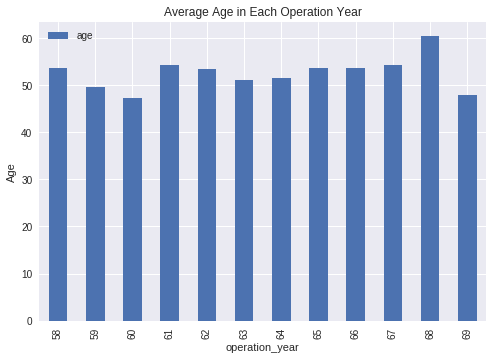

In [25]:
print('The correlation between age and operation year:',round(df.age.corr(df.operation_year),4))
df.pivot_table(values='age', index='operation_year').plot.bar()
plt.title('Average Age in Each Operation Year')
plt.ylabel('Age')
plt.show()